# Ⅰ. 주요 개념

# 1. GAN vs. c-GAN

## (1) 목적함수
- GAN
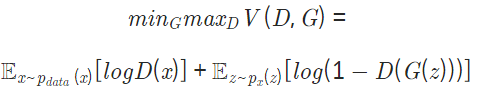
- c-GAN
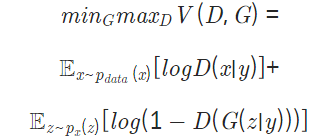
- 차이점 : D(x)와 G(z)가 각각 D(x∣y), G(z∣y)로 바뀜

## (2) 개요도
- GAN
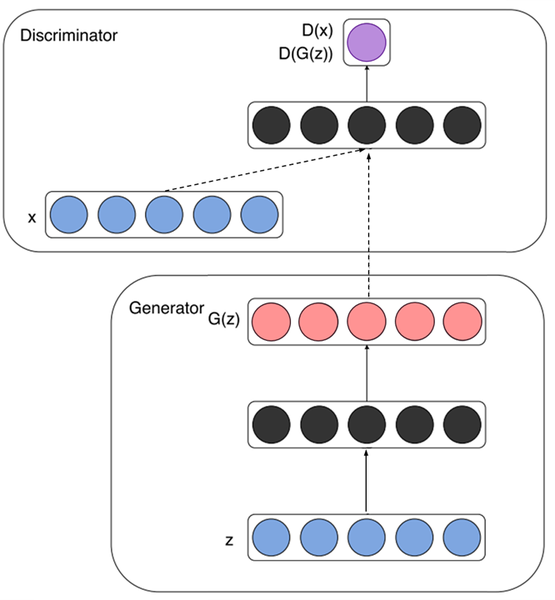
- c-GAN
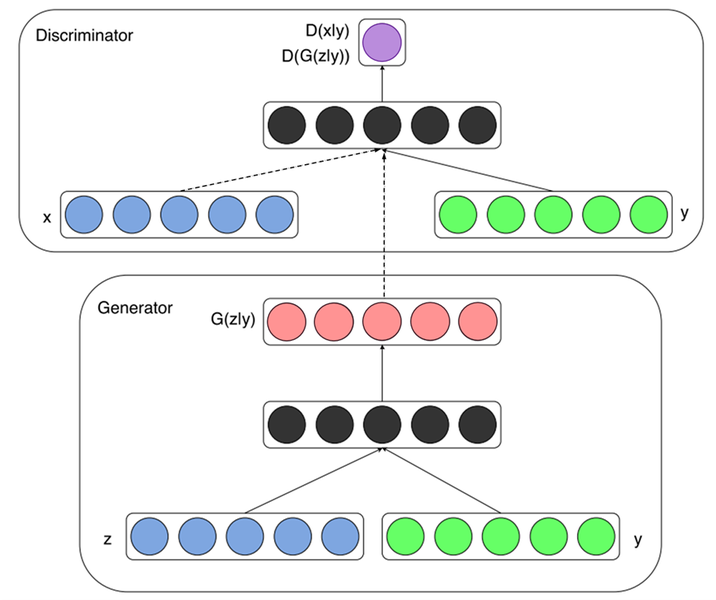

## (3) c-Generator 연산과정
① 노이즈 입력 및 레이블 입력은 각각 1개의 fully-connected 레이어와 ReLU 활성화를 통과합니다. (dense_z, dense_y)  
② ①문항의 각 결과가 서로 연결되어 다시 한번 1개의 fully-connected 레이어와 ReLU 활성화를 통과합니다 (tf.concat, conbined_dense)  
③ ②문항의 결과가 1개의 fully-connected 레이어 및 Hyperbolic tangent 활성화를 거쳐 28x28 차원의 결과가 생성되고 (28,28,1) 크기의 이미지 형태로 변환되어 출력됩니다 (final_dense, reshape)  

## (4) c-Discriminator 연산과정
① 이미지가 Maxout 레이어를 통과  
② 레이블이 Maxout 레이어를 통과  
③ ①과 ②결과로 나온 representation을 결합(concate) 후 Maxout 레이어를 통과  
※ Maxout 레이어 : 두 레이어 사이를 연결할 때, 여러 개의 fully-connected 레이어를 통과시켜 그 중 가장 큰 값을 가져오도록 함.  
  
## (5) 학습설계
- Loss function : Binary Cross Entropy
- Optimizer : Adam

# 2. Image-to-Image Translation(Pix2Pix)

## (1) 의의
- 한 이미지의 픽셀에서 다른 이미지의 픽셀로(pixel to pixel) 변환한다는 뜻에서 Pix2Pix라는 이름으로 불립니다.  
- GAN 기반의 Image-to-Image Translation 작업에서 가장 기초가 되는 연구임.  
-  이미지 변환이 목적인 Pix2Pix는 이미지를 다루는데 효율적인 convolution 레이어를 활용( 노이즈와 레이블 정보를 함께 입력했던 cGAN은 fully-connected 레이어를 연속적으로 쌓아 만듬)  
- GAN 구조를 기반으로 하기 때문에 크게 Generator와 Discriminator 두 가지 구성 요소로 이루어 짐.  
   
## (2) Encoder-decoder
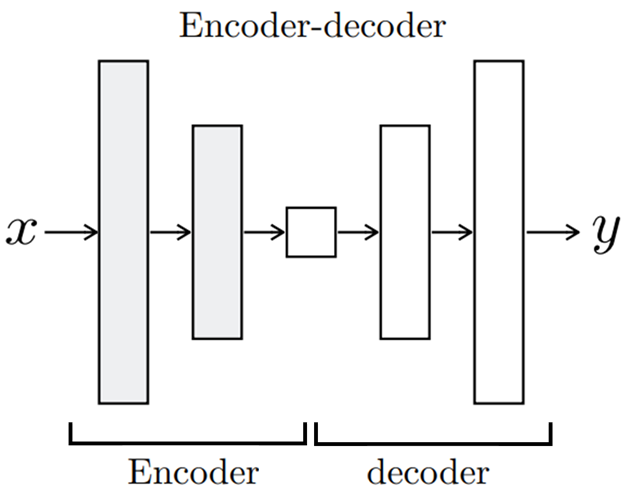
  
## (3) U-net
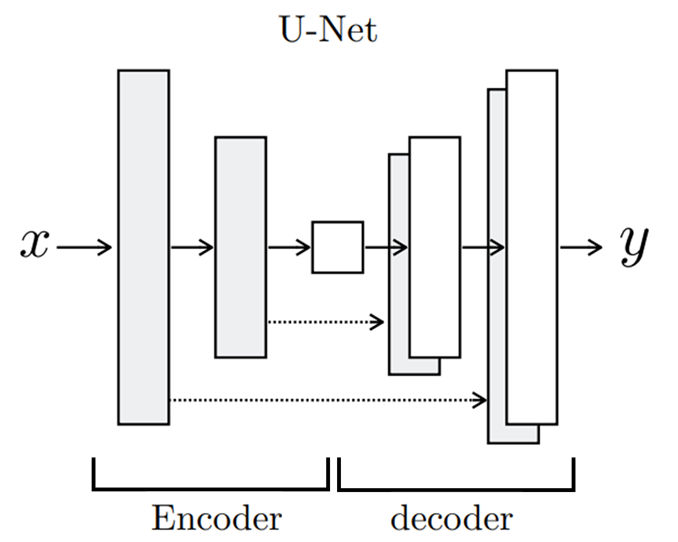

## (4) Loss function
-  L1손실과 GAN 손실을 같이 사용하면 더욱더 좋은 결과를 얻을 수 있다
※ 논문참조 https://medium.com/@msmapark2/u-net-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-u-net-convolutional-networks-for-biomedical-image-segmentation-456d6901b28a
  
## (5) Discriminator
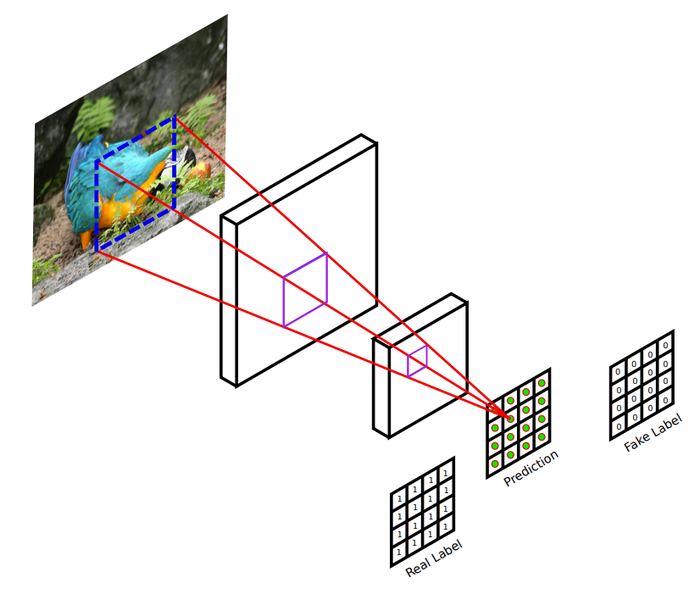
- 하나의 이미지가 Discriminator의 입력으로 들어오면, convolution 레이어를 거쳐 확률값을 나타내는 최종 결과를 생성하는데, 그 결과는 하나의 값이 아닌 여러 개의 값임. (위 그림의 Prediction은 16개의 값).   
- 위 그림에서 입력이미지의 파란색 점선은 여러 개의 출력 중 하나의 출력을 계산하기 위한 입력이미지의 receptive field 영역을 나타내고 있으며, 전체 영역을 다 보는 것이 아닌 일부 영역(파란색 점선)에 대해서만 진짜/가짜를 판별하는 하나의 확률값을 도출한다는 것임.   
- 이런 방식으로 서로 다른 영역에 대해 진짜/가짜를 나타내는 여러 개의 확률값을 계산할 수 있으며 이 값을 평균하여 최종 Discriminator의 출력을 생성  
- 이러한 방법은 이미지의 일부 영역(patch)을 이용한다고 하여 PatchGAN이라고 불림.  
- 일반적으로 이미지에서 거리가 먼 두 픽셀은 서로 연관성이 거의 없기 때문에 특정 크기를 가진 일부 영역에 대해서 세부적으로 진짜/가짜를 판별하는 것이 Generator로 하여금 더 진짜 같은 이미지를 만들도록 하는 방법임.  



# 3. 데이터셋
- 도로의 레이블 정보
- 1000개의 학습용 이미지 및 5개의 평가 이미지를 포함

# Ⅱ. 프로세스 및 라이브러리

# 1. Pix2Pix 응용-길거리 채색

## (1) Augmentation   
- 학습에 사용하는 데이터의 다양성을 높이기 위해 여러 augmentation 방법을 적용(apply_augmentation함수)  
- apply_augmentation함수의 절차   
① 두 이미지가 채널 축으로 연결됩니다. (tf.concat). 두 이미지가 각각 3채널인 경우 6채널이 됩니다.   
② ①의 결과에 각 50% 확률로 Refection padding 또는 constant padding이 30픽셀의 pad width만큼 적용됩니다. (tf.pad)   
③ ②의 결과에서 (256,256,6) 크기를 가진 이미지를 임의로 잘라냅니다. (tf.image.random_crop)   
④ ③의 결과를 50% 확률로 가로로 뒤집습니다. (tf.image.random_flip_left_right)   
⑤ ④의 결과를 50% 확률로 세로로 뒤집습니다. (tf.image.random_flip_up_down)   
⑥ ⑤의 결과를 50% 확률로 회전시킵니다. (tf.image.rot90)   

## (2) Generator의 구성요소
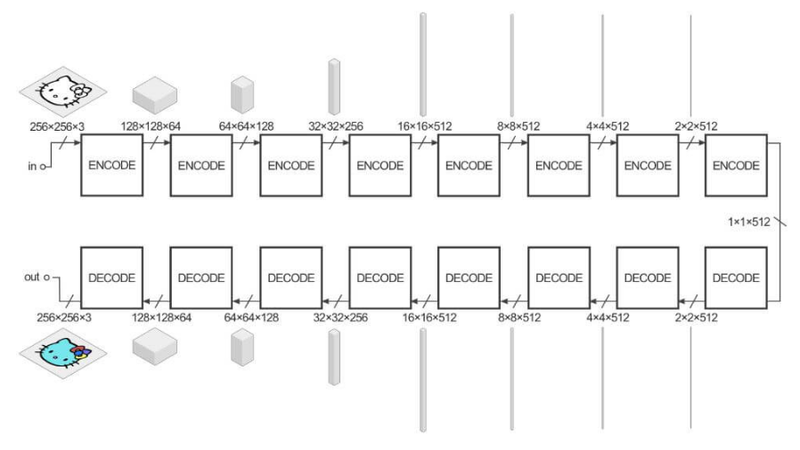

## (3)  Discriminator의 구조

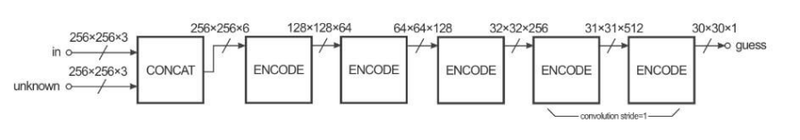

- Discriminator는 2개 입력(위 그림의 "in", "unknown")을 받아 연결(CONCAT)한 후, 
- ENCODE 라고 쓰인 5개의 블록을 통과   
- 이 중 마지막 블록을 제외한 4개 블록은 위 논문에서 표기된 "C64-C128-C256-C512"에 해당하며,   
- 마지막은 1(채널)차원 출력을 위한 블록이 추가됨   
   
※ Discriminator 절차   
1. (128,128,32) 크기의 입력이 layers.ZeroPadding2D()를 통과하면, width 및 height의 양쪽 면에 각각 1씩 패딩되어 총 2만큼 크기가 늘어납니다. 출력 : (130,130,32)
2. 패딩하지 않고 필터 크기 4 및 간격(stride) 1의 convolution 레이어를 통과하면 width 및 height 가 3씩 줄어듭니다. 이는 OutSize=(InSize+2∗PadSize−FilterSize)/Stride+1 의 식으로 계산할 수 있습니다. 채널 수는 사용한 필터 개수와 같습니다. 출력 : (127,127,64)
3. 이 외 다른 레이어(BatchNorm, LeakyReLU)는 출력의 크기에 영향을 주지 않습니다.

## (4) Generator 및 Discriminator의 손실 계산
- Generator의 손실함수 (위 코드의 get_gene_loss)는 총 3개의 입력이 있습니다. 이 중 fake_disc는 Generator가 생성한 가짜 이미지를 Discriminator에 입력하여 얻어진 값이며, 실제 이미지를 뜻하는 "1"과 비교하기 위해 tf.ones_like()를 사용합니다. 또한 L1 손실을 계산하기 위해 생성한 가짜 이미지(fake_output)와 실제 이미지(real_output) 사이의 MAE(Mean Absolute Error)를 계산합니다.
- Discriminator의 손실함수 (위 코드의 get_disc_loss)는 2개의 입력이 있으며, 이들은 가짜 및 진짜 이미지가 Discriminator에 각각 입력되어 얻어진 값입니다. Discriminator는 실제 이미지를 잘 구분해 내야 하므로 real_disc는 "1"로 채워진 벡터와 비교하고, fake_disc는 "0"으로 채워진 벡터와 비교합니다.

# Ⅲ 프로젝트

1. 데이터에 한 가지 이상의 augmentation 방법을 적용하여 학습해주세요.(어떠한 방법을 사용했는지 적어주세요.)
2. 이전에 구현했던 두 개의 Generator 중 Encoder와 Decoder간에 skip connection이 있는 U-Net Generator를 사용해주세요.
3. 모델 학습 후, 학습된 Generator를 이용해 테스트합니다. 테스트 데이터는 다운받았던 "val" 폴더 내 이미지를 사용해주세요.
4. 1개 이상의 이미지에 대해 테스트 과정을 거친 후 그 결과를 스케치, 생성된 사진, 실제 사진 순서로 나란히 시각화해 주세요.
5. 모델을 충분히 학습하기에 시간이 부족할 수 있습니다. 적어도 10 epoch 이상 학습하며 중간 손실 값에 대한 로그를 남겨주세요. 좋은 결과를 얻기 위해선 긴 학습 시간이 필요하므로 테스트 결과는 만족스럽지 않아도 괜찮습니다.

# 1. 데이터 준비하기

In [ ]:
# $ mkdir -p ~/aiffel/Exploration/19_conditional_generation/data/cityscapes/train/
# $ wget https://d3s0tskafalll9.cloudfront.net/media/documents/cityscapes.zip
# $ mv cityscapes.zip ~/aiffel/Exploration/19_conditional_generation/data/cityscapes/train/
# $ cd ~/aiffel/Exploration/19_conditional_generation/data && unzip cityscapes.zip

In [1]:
import os

data_path = os.getenv('HOME')+'/aiffel/Exploration/19_conditional_generation/data/cityscapes/train/'
print("number of train examples :", len(os.listdir(data_path)))

number of train examples : 1001


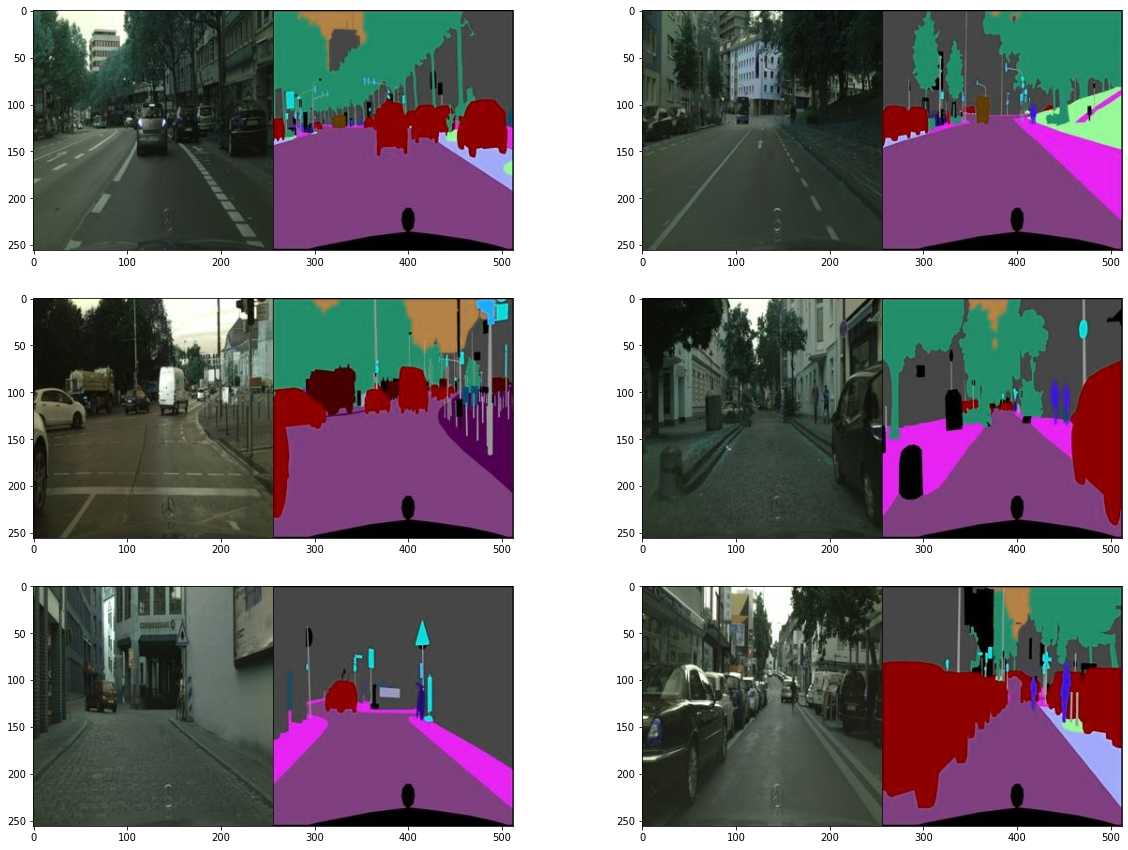

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 각각의 이미지들이 어떻게 생겼는지 확인
# 학습용 데이터셋에서 임의로 6장을 선택하여 시각화
plt.figure(figsize=(20,15))
for i in range(1, 7):
    f = data_path + os.listdir(data_path)[np.random.randint(800)]
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    plt.subplot(3,2,i)
    plt.imshow(img)

In [3]:
# 이미지 크기 확인
f = data_path + os.listdir(data_path)[0]
img = cv2.imread(f, cv2.IMREAD_COLOR)
print(img.shape)

(256, 512, 3)


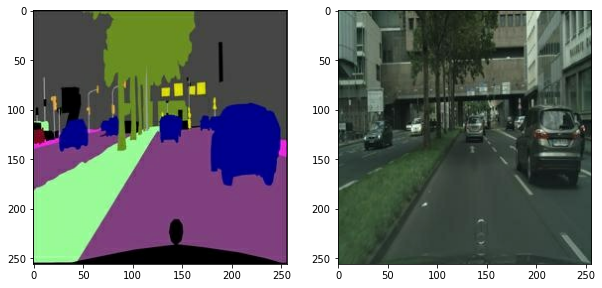

In [4]:
import tensorflow as tf

def normalize(x):
    x = tf.cast(x, tf.float32)
    return (x/127.5) - 1

def denormalize(x):
    x = (x+1)*127.5
    x = x.numpy()
    return x.astype(np.uint8)

def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, 3)
    
    w = tf.shape(img)[1] // 2
    sketch = img[:, :w, :] 
    sketch = tf.cast(sketch, tf.float32)
    colored = img[:, w:, :] 
    colored = tf.cast(colored, tf.float32)
    return normalize(sketch), normalize(colored)

f = data_path + os.listdir(data_path)[1]
colored, sketch = load_img(f)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1); plt.imshow(denormalize(sketch))
plt.subplot(1,2,2); plt.imshow(denormalize(colored))

# 2. 데이터 전처리

학습 데이터의 다양성을 높이기 위해 아래와 같은 여러 augmentation 방법을 적용한다.

- 두 이미지를 채널 축으로 연결 (tf.concat)  
- 50% 확률로 Refection padding 또는 constant padding이 30픽셀의 pad width 만큼 적용(tf.pad)  
- (256,256,6) 크기를 가진 이미지를 임의로 잘라냄(tf.image.random_crop)  
- 각각 50% 확률로 가로 및 세로로 뒤집음 (tf.image.random_flip_left_right, tf.image.random_flip_up_down)  
- 50% 확률로 90도 회전 (tf.image.rot90)  

In [5]:
from tensorflow import image
from tensorflow.keras.preprocessing.image import random_rotation

@tf.function() # 빠른 텐서플로 연산을 위해 @tf.function()을 사용합니다. 
def apply_augmentation(sketch, colored):
    stacked = tf.concat([sketch, colored], axis=-1)
    
    _pad = tf.constant([[30,30],[30,30],[0,0]])
    if tf.random.uniform(()) < .5:
        padded = tf.pad(stacked, _pad, "REFLECT")
    else:
        padded = tf.pad(stacked, _pad, "CONSTANT", constant_values=1.)

    out = image.random_crop(padded, size=[256, 256, 6])
    
    out = image.random_flip_left_right(out)
    out = image.random_flip_up_down(out)
    
    if tf.random.uniform(()) < .5:
        degree = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
        out = image.rot90(out, k=degree)
    
    return out[...,:3], out[...,3:]   

print("✅")

✅


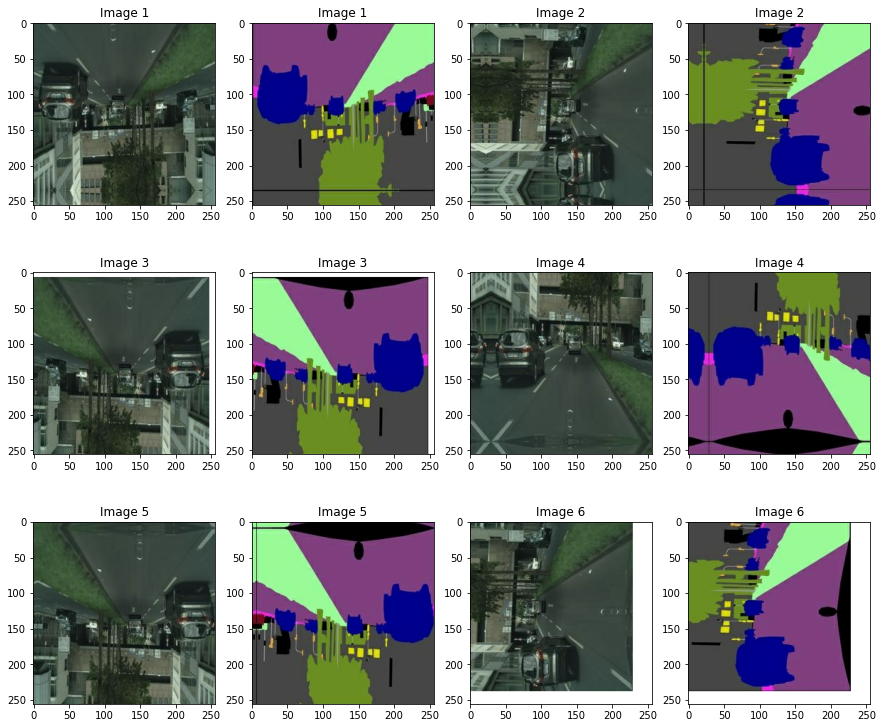

In [6]:
plt.figure(figsize=(15,13))
img_n = 1
for i in range(1, 13, 2):
    augmented_colored, augmented_sketch = apply_augmentation(sketch, colored)
    
    plt.subplot(3,4,i)
    plt.imshow(denormalize(augmented_sketch)); plt.title(f"Image {img_n}")
    plt.subplot(3,4,i+1); 
    plt.imshow(denormalize(augmented_colored)); plt.title(f"Image {img_n}")
    img_n += 1

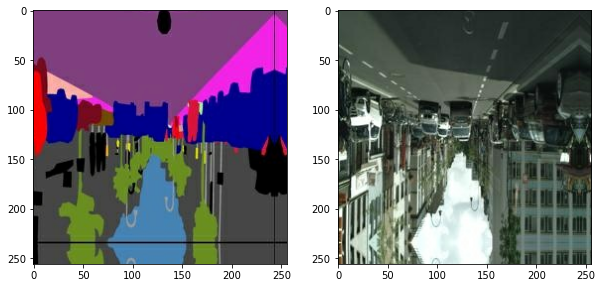

In [7]:
from tensorflow import data

def get_train(img_path):
    colored, sketch = load_img(img_path)
    colored, sketch = apply_augmentation(sketch, colored)
    return sketch, colored

train_images = data.Dataset.list_files(data_path + "*.jpg")
train_images = train_images.map(get_train).shuffle(100).batch(4)

sample = train_images.take(1)
sample = list(sample.as_numpy_iterator())
colored, sketch = (sample[0][0]+1)*127.5, (sample[0][1]+1)*127.5

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(sketch[0].astype(np.uint8))
plt.subplot(1,2,2); plt.imshow(colored[0].astype(np.uint8))

# 6. Generator 재구성하기

Encoder와 Decoder간에 skip connection이 있는 U-Net Generator를 사용한다.

In [8]:
from tensorflow.keras import layers, Input, Model


class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn       
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.lrelu = layers.LeakyReLU(0.2)

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)

    
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x)
        return self.relu(x)
    
print("✅")

✅


In [9]:
class UNetGenerator(Model):
    def __init__(self):
        super(UNetGenerator, self).__init__()
        encode_filters = [64,128,256,512,512,512,512,512]
        decode_filters = [512,512,512,512,256,128,64]
        
        self.encode_blocks = []
        for i, f in enumerate(encode_filters):
            if i == 0:
                self.encode_blocks.append(EncodeBlock(f, use_bn=False))
            else:
                self.encode_blocks.append(EncodeBlock(f))
        
        self.decode_blocks = []
        for i, f in enumerate(decode_filters):
            if i < 3:
                self.decode_blocks.append(DecodeBlock(f))
            else:
                self.decode_blocks.append(DecodeBlock(f, dropout=False))
        
        self.last_conv = layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False)
    
    def call(self, x):
        features = []
        for block in self.encode_blocks:
            x = block(x)
            features.append(x)
        
        features = features[:-1]
                    
        for block, feat in zip(self.decode_blocks, features[::-1]):
            x = block(x)
            x = layers.Concatenate()([x, feat])
        
        x = self.last_conv(x)
        return x
                
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()

print("✅")

✅


완성된 U-Net 구조 Generator 내부의 각 출력이 적절한지 확인해보자.

In [10]:
UNetGenerator().get_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
encode_block (EncodeBlock)      (None, 128, 128, 64) 3072        input_1[0][0]                    
__________________________________________________________________________________________________
encode_block_1 (EncodeBlock)    (None, 64, 64, 128)  131584      encode_block[0][0]               
__________________________________________________________________________________________________
encode_block_2 (EncodeBlock)    (None, 32, 32, 256)  525312      encode_block_1[0][0]             
______________________________________________________________________________________________

# Discriminator 구성하기

## (2) Discriminator 구현하기

In [11]:
class DiscBlock(layers.Layer):
    def __init__(self, n_filters, stride=2, custom_pad=False, use_bn=True, act=True):
        super(DiscBlock, self).__init__()
        self.custom_pad = custom_pad
        self.use_bn = use_bn
        self.act = act
        
        if custom_pad:
            self.padding = layers.ZeroPadding2D()
            self.conv = layers.Conv2D(n_filters, 4, stride, "valid", use_bias=False)
        else:
            self.conv = layers.Conv2D(n_filters, 4, stride, "same", use_bias=False)
        
        self.batchnorm = layers.BatchNormalization() if use_bn else None
        self.lrelu = layers.LeakyReLU(0.2) if act else None
        
    def call(self, x):
        if self.custom_pad:
            x = self.padding(x)
            x = self.conv(x)
        else:
            x = self.conv(x)
                
        if self.use_bn:
            x = self.batchnorm(x)
            
        if self.act:
            x = self.lrelu(x)
        return x 

print("✅")

✅


In [12]:
# inputs = Input((128,128,32))
# out = layers.ZeroPadding2D()(inputs)
# out = layers.Conv2D(64, 4, 1, "valid", use_bias=False)(out)
# out = layers.BatchNormalization()(out)
# out = layers.LeakyReLU(0.2)(out)

# Model(inputs, out).summary()

In [12]:
class Discriminator(Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.block1 = layers.Concatenate()
        self.block2 = DiscBlock(n_filters=64, stride=2, custom_pad=False, use_bn=False, act=True)
        self.block3 = DiscBlock(n_filters=128, stride=2, custom_pad=False, use_bn=True, act=True)
        self.block4 = DiscBlock(n_filters=256, stride=2, custom_pad=False, use_bn=True, act=True)
        self.block5 = DiscBlock(n_filters=512, stride=1, custom_pad=True, use_bn=True, act=True)
        self.block6 = DiscBlock(n_filters=1, stride=1, custom_pad=True, use_bn=False, act=False)
        self.sigmoid = layers.Activation("sigmoid")
        
        # filters = [64,128,256,512,1]
        # self.blocks = [layers.Concatenate()]
        # for i, f in enumerate(filters):
        #     self.blocks.append(DiscBlock(
        #         n_filters=f,
        #         strides=2 if i<3 else 1,
        #         custom_pad=False if i<3 else True,
        #         use_bn=False if i==0 and i==4 else True,
        #         act=True if i<4 else False
        #     ))
    
    def call(self, x, y):
        out = self.block1([x, y])
        out = self.block2(out)
        out = self.block3(out)
        out = self.block4(out)
        out = self.block5(out)
        out = self.block6(out)
        return self.sigmoid(out)
    
    def get_summary(self, x_shape=(256,256,3), y_shape=(256,256,3)):
        x, y = Input(x_shape), Input(y_shape) 
        return Model((x, y), self.call(x, y)).summary()
    
print("✅")

✅


In [13]:
Discriminator().get_summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 256, 256, 6)  0           input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
disc_block (DiscBlock)          (None, 128, 128, 64) 6144        concatenate_7[0][0]        

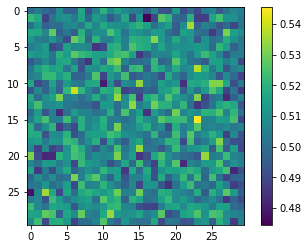

In [14]:
x = tf.random.normal([1,256,256,3])
y = tf.random.uniform([1,256,256,3])

disc_out = Discriminator()(x, y)
plt.imshow(disc_out[0, ... ,0])
plt.colorbar()

# 학습 및 테스트하기

In [27]:
from tensorflow.keras import losses

bce = losses.BinaryCrossentropy(from_logits=False)
mae = losses.MeanAbsoluteError()

def get_gene_loss(fake_output, real_output, fake_disc):
    l1_loss = mae(real_output, fake_output)
    gene_loss = bce(tf.ones_like(fake_disc), fake_disc)
    return gene_loss, l1_loss

def get_disc_loss(fake_disc, real_disc):
    return bce(tf.zeros_like(fake_disc), fake_disc) + bce(tf.ones_like(real_disc), real_disc)

print("✅")

✅


In [28]:
from tensorflow.keras import optimizers

gene_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)
disc_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)

print("✅")

✅


In [29]:
@tf.function
def train_step(sketch, real_colored):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
        # Generator 예측
        fake_colored = generator(sketch, training=True)
        # Discriminator 예측
        fake_disc = discriminator(sketch, fake_colored, training=True)
        real_disc = discriminator(sketch, real_colored, training=True)
        # Generator 손실 계산
        gene_loss, l1_loss = get_gene_loss(fake_colored, real_colored, fake_disc)
        gene_total_loss = gene_loss + (100 * l1_loss) ## <===== L1 손실 반영 λ=100
        # Discrminator 손실 계산
        disc_loss = get_disc_loss(fake_disc, real_disc)
                
    gene_gradient = gene_tape.gradient(gene_total_loss, generator.trainable_variables)
    disc_gradient = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    gene_opt.apply_gradients(zip(gene_gradient, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradient, discriminator.trainable_variables))
    return gene_loss, l1_loss, disc_loss

print("✅")

✅


In [30]:
EPOCHS = 20 #약 30분 정도 소요 됩니다.

generator = UNetGenerator()
discriminator = Discriminator()

for epoch in range(1, EPOCHS+1):
    for i, (colored, sketch) in enumerate(train_images):
        g_loss, l1_loss, d_loss = train_step(colored, sketch)
                
        # 10회 반복마다 손실을 출력합니다.
        if (i+1) % 10 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

EPOCH[1] - STEP[10]                     
Generator_loss:0.9285                     
L1_loss:0.2804                     
Discriminator_loss:1.3103

EPOCH[1] - STEP[20]                     
Generator_loss:0.9826                     
L1_loss:0.3507                     
Discriminator_loss:1.1497

EPOCH[1] - STEP[30]                     
Generator_loss:1.1725                     
L1_loss:0.2846                     
Discriminator_loss:0.9403

EPOCH[1] - STEP[40]                     
Generator_loss:1.4084                     
L1_loss:0.2883                     
Discriminator_loss:0.8338

EPOCH[1] - STEP[50]                     
Generator_loss:1.5322                     
L1_loss:0.2509                     
Discriminator_loss:0.7803

EPOCH[1] - STEP[60]                     
Generator_loss:1.3366                     
L1_loss:0.2243                     
Discriminator_loss:0.8636

EPOCH[1] - STEP[70]                     
Generator_loss:1.5348                     
L1_loss:0.3137                    

EPOCH[3] - STEP[70]                     
Generator_loss:2.5929                     
L1_loss:0.2210                     
Discriminator_loss:0.8335

EPOCH[3] - STEP[80]                     
Generator_loss:1.9131                     
L1_loss:0.1726                     
Discriminator_loss:0.3592

EPOCH[3] - STEP[90]                     
Generator_loss:1.8612                     
L1_loss:0.2616                     
Discriminator_loss:0.4620

EPOCH[3] - STEP[100]                     
Generator_loss:1.9780                     
L1_loss:0.2160                     
Discriminator_loss:0.8353

EPOCH[3] - STEP[110]                     
Generator_loss:3.3428                     
L1_loss:0.2153                     
Discriminator_loss:1.4074

EPOCH[3] - STEP[120]                     
Generator_loss:1.4496                     
L1_loss:0.1811                     
Discriminator_loss:0.5103

EPOCH[3] - STEP[130]                     
Generator_loss:2.4428                     
L1_loss:0.2281                

EPOCH[5] - STEP[130]                     
Generator_loss:0.9573                     
L1_loss:0.2321                     
Discriminator_loss:0.6617

EPOCH[5] - STEP[140]                     
Generator_loss:1.4521                     
L1_loss:0.1791                     
Discriminator_loss:0.6429

EPOCH[5] - STEP[150]                     
Generator_loss:1.3756                     
L1_loss:0.1919                     
Discriminator_loss:1.1366

EPOCH[5] - STEP[160]                     
Generator_loss:2.6445                     
L1_loss:0.1740                     
Discriminator_loss:0.4076

EPOCH[5] - STEP[170]                     
Generator_loss:1.5819                     
L1_loss:0.1969                     
Discriminator_loss:1.0734

EPOCH[5] - STEP[180]                     
Generator_loss:1.5157                     
L1_loss:0.1947                     
Discriminator_loss:1.3489

EPOCH[5] - STEP[190]                     
Generator_loss:2.3005                     
L1_loss:0.1893             

EPOCH[7] - STEP[190]                     
Generator_loss:1.5950                     
L1_loss:0.1861                     
Discriminator_loss:0.8626

EPOCH[7] - STEP[200]                     
Generator_loss:1.1642                     
L1_loss:0.2187                     
Discriminator_loss:0.4962

EPOCH[7] - STEP[210]                     
Generator_loss:2.2091                     
L1_loss:0.1875                     
Discriminator_loss:0.3702

EPOCH[7] - STEP[220]                     
Generator_loss:1.7843                     
L1_loss:0.2000                     
Discriminator_loss:0.3516

EPOCH[7] - STEP[230]                     
Generator_loss:1.4316                     
L1_loss:0.1847                     
Discriminator_loss:0.5690

EPOCH[7] - STEP[240]                     
Generator_loss:1.6243                     
L1_loss:0.2234                     
Discriminator_loss:0.6275

EPOCH[7] - STEP[250]                     
Generator_loss:1.8594                     
L1_loss:0.1876             

EPOCH[9] - STEP[250]                     
Generator_loss:1.5481                     
L1_loss:0.1761                     
Discriminator_loss:0.5169

EPOCH[10] - STEP[10]                     
Generator_loss:3.1032                     
L1_loss:0.1875                     
Discriminator_loss:0.7484

EPOCH[10] - STEP[20]                     
Generator_loss:1.1073                     
L1_loss:0.2169                     
Discriminator_loss:0.7570

EPOCH[10] - STEP[30]                     
Generator_loss:2.5834                     
L1_loss:0.2029                     
Discriminator_loss:0.3082

EPOCH[10] - STEP[40]                     
Generator_loss:0.7844                     
L1_loss:0.1930                     
Discriminator_loss:0.9496

EPOCH[10] - STEP[50]                     
Generator_loss:3.4335                     
L1_loss:0.2032                     
Discriminator_loss:1.7113

EPOCH[10] - STEP[60]                     
Generator_loss:1.7142                     
L1_loss:0.1638             

EPOCH[12] - STEP[60]                     
Generator_loss:1.0751                     
L1_loss:0.1685                     
Discriminator_loss:0.6490

EPOCH[12] - STEP[70]                     
Generator_loss:2.0962                     
L1_loss:0.1974                     
Discriminator_loss:0.4081

EPOCH[12] - STEP[80]                     
Generator_loss:0.6416                     
L1_loss:0.1973                     
Discriminator_loss:0.9784

EPOCH[12] - STEP[90]                     
Generator_loss:1.6884                     
L1_loss:0.1683                     
Discriminator_loss:0.3749

EPOCH[12] - STEP[100]                     
Generator_loss:1.1325                     
L1_loss:0.1628                     
Discriminator_loss:0.7519

EPOCH[12] - STEP[110]                     
Generator_loss:1.6750                     
L1_loss:0.1813                     
Discriminator_loss:0.5764

EPOCH[12] - STEP[120]                     
Generator_loss:1.8935                     
L1_loss:0.1894          

EPOCH[14] - STEP[120]                     
Generator_loss:3.1224                     
L1_loss:0.1540                     
Discriminator_loss:0.6389

EPOCH[14] - STEP[130]                     
Generator_loss:2.2077                     
L1_loss:0.1916                     
Discriminator_loss:0.2959

EPOCH[14] - STEP[140]                     
Generator_loss:1.4213                     
L1_loss:0.1617                     
Discriminator_loss:0.5610

EPOCH[14] - STEP[150]                     
Generator_loss:2.8613                     
L1_loss:0.1993                     
Discriminator_loss:0.3622

EPOCH[14] - STEP[160]                     
Generator_loss:2.6712                     
L1_loss:0.1773                     
Discriminator_loss:0.3673

EPOCH[14] - STEP[170]                     
Generator_loss:0.3685                     
L1_loss:0.1484                     
Discriminator_loss:1.7224

EPOCH[14] - STEP[180]                     
Generator_loss:3.2901                     
L1_loss:0.2424      

EPOCH[16] - STEP[180]                     
Generator_loss:1.7682                     
L1_loss:0.1614                     
Discriminator_loss:0.3759

EPOCH[16] - STEP[190]                     
Generator_loss:2.3283                     
L1_loss:0.1668                     
Discriminator_loss:0.2183

EPOCH[16] - STEP[200]                     
Generator_loss:1.6277                     
L1_loss:0.1920                     
Discriminator_loss:0.4414

EPOCH[16] - STEP[210]                     
Generator_loss:2.9831                     
L1_loss:0.1845                     
Discriminator_loss:0.8580

EPOCH[16] - STEP[220]                     
Generator_loss:2.0319                     
L1_loss:0.2047                     
Discriminator_loss:0.7585

EPOCH[16] - STEP[230]                     
Generator_loss:1.5274                     
L1_loss:0.1749                     
Discriminator_loss:0.3830

EPOCH[16] - STEP[240]                     
Generator_loss:2.6143                     
L1_loss:0.1443      

EPOCH[18] - STEP[240]                     
Generator_loss:3.3396                     
L1_loss:0.2055                     
Discriminator_loss:0.1406

EPOCH[18] - STEP[250]                     
Generator_loss:2.9318                     
L1_loss:0.1725                     
Discriminator_loss:0.4142

EPOCH[19] - STEP[10]                     
Generator_loss:2.1172                     
L1_loss:0.1488                     
Discriminator_loss:1.0093

EPOCH[19] - STEP[20]                     
Generator_loss:1.4609                     
L1_loss:0.1589                     
Discriminator_loss:1.1848

EPOCH[19] - STEP[30]                     
Generator_loss:1.8490                     
L1_loss:0.1678                     
Discriminator_loss:0.6358

EPOCH[19] - STEP[40]                     
Generator_loss:2.8836                     
L1_loss:0.1762                     
Discriminator_loss:0.4426

EPOCH[19] - STEP[50]                     
Generator_loss:3.2207                     
L1_loss:0.1517           

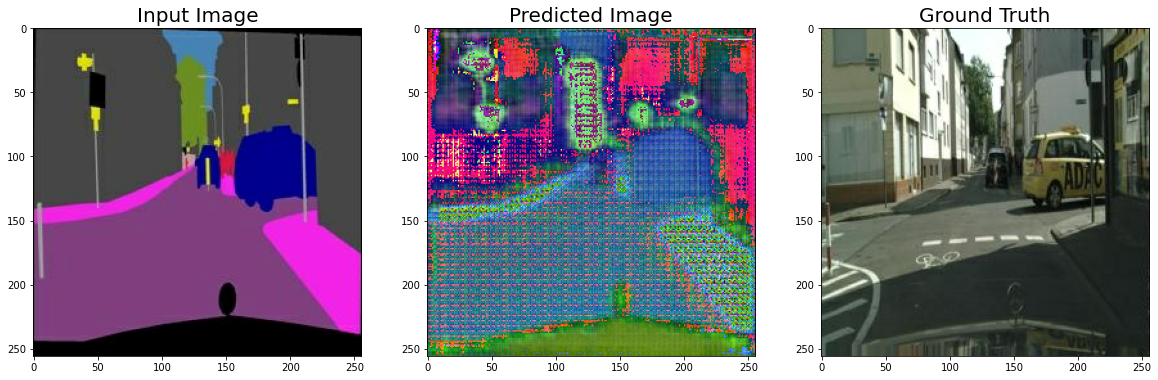

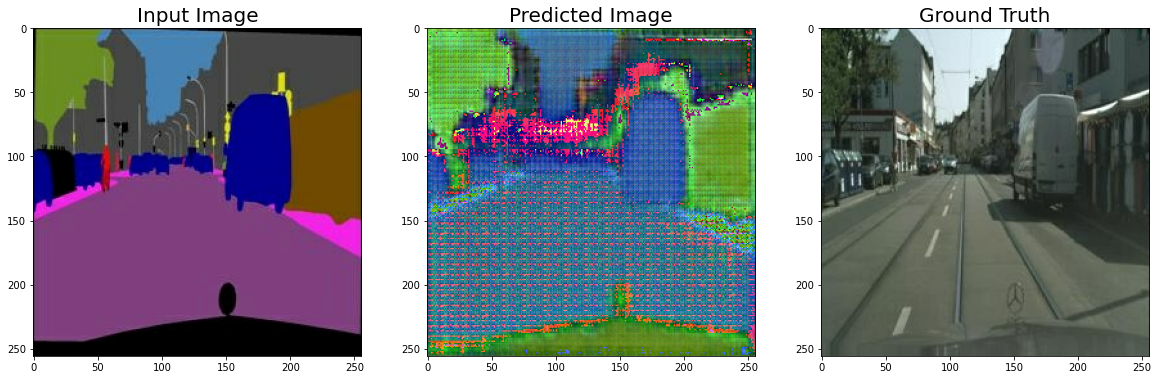

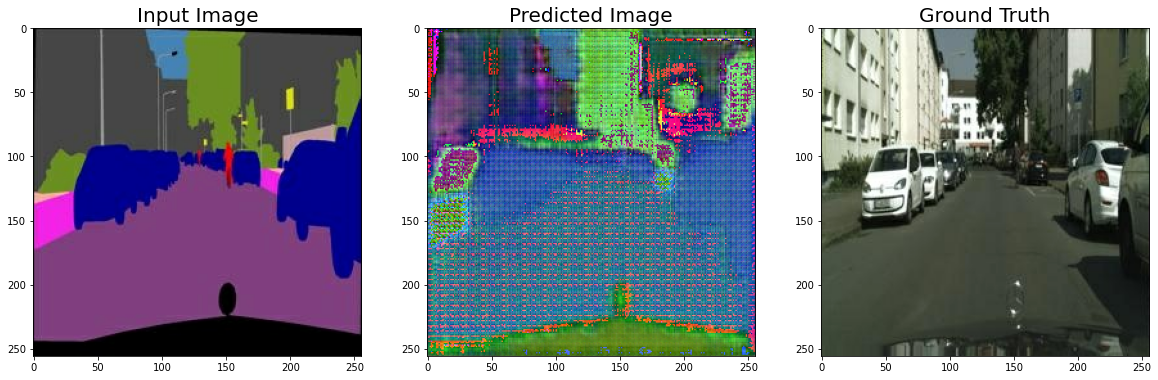

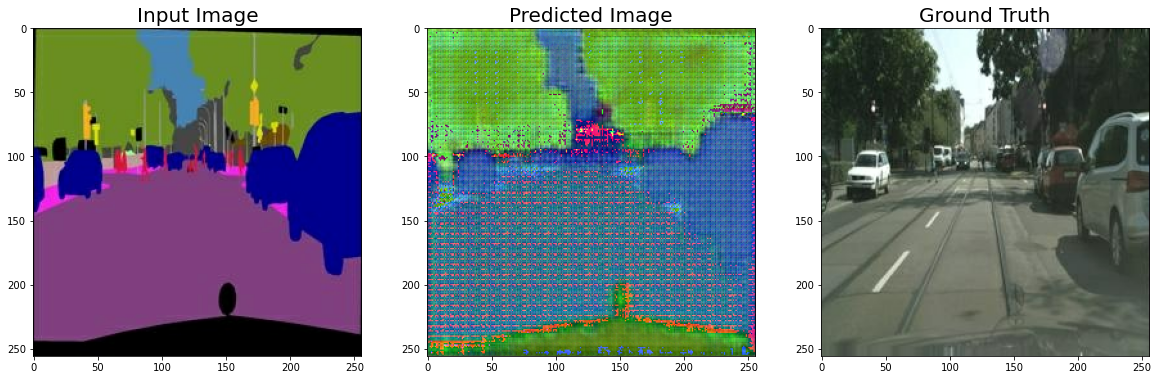

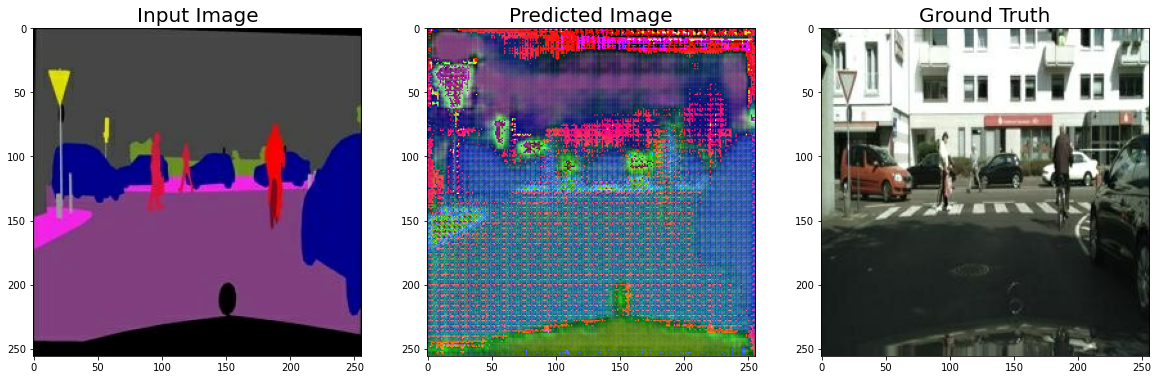

In [31]:
test_path = '/aiffel/aiffel/Exploration/19_conditional_generation/data/cityscapes/val/'

for i in range(5):
    f = test_path + os.listdir(test_path)[i]
    real_img, seg_img = load_img(f)

    pred = generator(tf.expand_dims(seg_img, 0))
    pred = denormalize(pred)

    plt.figure(figsize=(20,10))
    plt.subplot(1,3,1); plt.imshow(denormalize(seg_img)); plt.title('Input Image', fontsize=20)
    plt.subplot(1,3,2); plt.imshow(pred[0]); plt.title('Predicted Image', fontsize=20)
    plt.subplot(1,3,3); plt.imshow(denormalize(real_img)); plt.title('Ground Truth', fontsize=20)

epochs = 20 으로는 아직 만족할만한 결과물이 나오지 않는다. 더 나은 품질의 이미지 생성을 위해 100epochs 를 추가로 학습한다.

In [ ]:
EPOCHS = 200 

for epoch in range(1, EPOCHS+1):
    for i, (real_img, seg_img) in enumerate(train_images):
        g_loss, l1_loss, d_loss = train_step(real_img, seg_img)
                
        # 반복마다 손실을 출력
        if (i+1) % 100 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

EPOCH[1] - STEP[100]                     
Generator_loss:1.7703                     
L1_loss:0.1849                     
Discriminator_loss:0.2879

EPOCH[1] - STEP[200]                     
Generator_loss:2.2103                     
L1_loss:0.1520                     
Discriminator_loss:1.4834

EPOCH[2] - STEP[100]                     
Generator_loss:0.9746                     
L1_loss:0.1723                     
Discriminator_loss:0.9847

EPOCH[2] - STEP[200]                     
Generator_loss:2.8414                     
L1_loss:0.1228                     
Discriminator_loss:1.0029

EPOCH[3] - STEP[100]                     
Generator_loss:3.3666                     
L1_loss:0.1566                     
Discriminator_loss:0.2098

EPOCH[3] - STEP[200]                     
Generator_loss:3.9657                     
L1_loss:0.1349                     
Discriminator_loss:2.2920

EPOCH[4] - STEP[100]                     
Generator_loss:4.4834                     
L1_loss:0.1893             

EPOCH[29] - STEP[100]                     
Generator_loss:2.0055                     
L1_loss:0.1224                     
Discriminator_loss:0.3087

EPOCH[29] - STEP[200]                     
Generator_loss:1.7215                     
L1_loss:0.1495                     
Discriminator_loss:0.4335

EPOCH[30] - STEP[100]                     
Generator_loss:2.9695                     
L1_loss:0.1458                     
Discriminator_loss:0.1356

EPOCH[30] - STEP[200]                     
Generator_loss:2.7066                     
L1_loss:0.1435                     
Discriminator_loss:0.1777

EPOCH[31] - STEP[100]                     
Generator_loss:4.1217                     
L1_loss:0.1499                     
Discriminator_loss:0.1220

EPOCH[31] - STEP[200]                     
Generator_loss:3.0876                     
L1_loss:0.1180                     
Discriminator_loss:1.2677

EPOCH[32] - STEP[100]                     
Generator_loss:2.1708                     
L1_loss:0.1274      

EPOCH[56] - STEP[200]                     
Generator_loss:1.4137                     
L1_loss:0.1378                     
Discriminator_loss:0.5389

EPOCH[57] - STEP[100]                     
Generator_loss:3.0556                     
L1_loss:0.1819                     
Discriminator_loss:0.0971

EPOCH[57] - STEP[200]                     
Generator_loss:3.6560                     
L1_loss:0.1143                     
Discriminator_loss:0.1696

EPOCH[58] - STEP[100]                     
Generator_loss:2.8680                     
L1_loss:0.1410                     
Discriminator_loss:0.2762

EPOCH[58] - STEP[200]                     
Generator_loss:2.8482                     
L1_loss:0.1396                     
Discriminator_loss:0.2846

EPOCH[59] - STEP[100]                     
Generator_loss:2.7000                     
L1_loss:0.1224                     
Discriminator_loss:0.2311

EPOCH[59] - STEP[200]                     
Generator_loss:6.5732                     
L1_loss:0.1401      

EPOCH[84] - STEP[100]                     
Generator_loss:4.8084                     
L1_loss:0.1116                     
Discriminator_loss:0.3710

EPOCH[84] - STEP[200]                     
Generator_loss:2.5483                     
L1_loss:0.1215                     
Discriminator_loss:0.4175

EPOCH[85] - STEP[100]                     
Generator_loss:2.6579                     
L1_loss:0.1418                     
Discriminator_loss:0.2549

EPOCH[85] - STEP[200]                     
Generator_loss:3.9351                     
L1_loss:0.1645                     
Discriminator_loss:0.3164

EPOCH[86] - STEP[100]                     
Generator_loss:1.4789                     
L1_loss:0.1240                     
Discriminator_loss:0.6721

EPOCH[86] - STEP[200]                     
Generator_loss:1.0503                     
L1_loss:0.1277                     
Discriminator_loss:0.9704

EPOCH[87] - STEP[100]                     
Generator_loss:2.0429                     
L1_loss:0.1665      

EPOCH[111] - STEP[200]                     
Generator_loss:0.1303                     
L1_loss:0.1421                     
Discriminator_loss:2.9047

EPOCH[112] - STEP[100]                     
Generator_loss:2.5715                     
L1_loss:0.1281                     
Discriminator_loss:0.2358

EPOCH[112] - STEP[200]                     
Generator_loss:4.4277                     
L1_loss:0.1330                     
Discriminator_loss:0.9803

EPOCH[113] - STEP[100]                     
Generator_loss:2.6761                     
L1_loss:0.1253                     
Discriminator_loss:0.1513

EPOCH[113] - STEP[200]                     
Generator_loss:3.5380                     
L1_loss:0.1221                     
Discriminator_loss:0.0732

EPOCH[114] - STEP[100]                     
Generator_loss:4.2830                     
L1_loss:0.1432                     
Discriminator_loss:0.2214

EPOCH[114] - STEP[200]                     
Generator_loss:3.3598                     
L1_loss:0.099

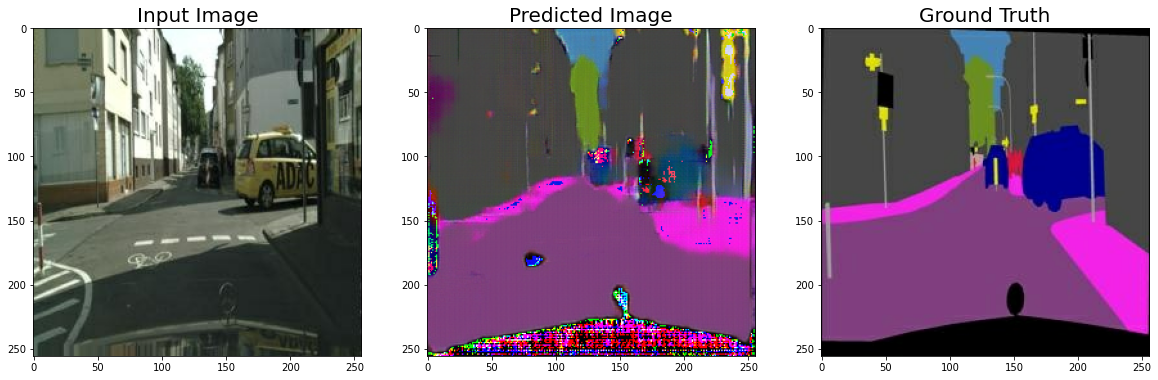

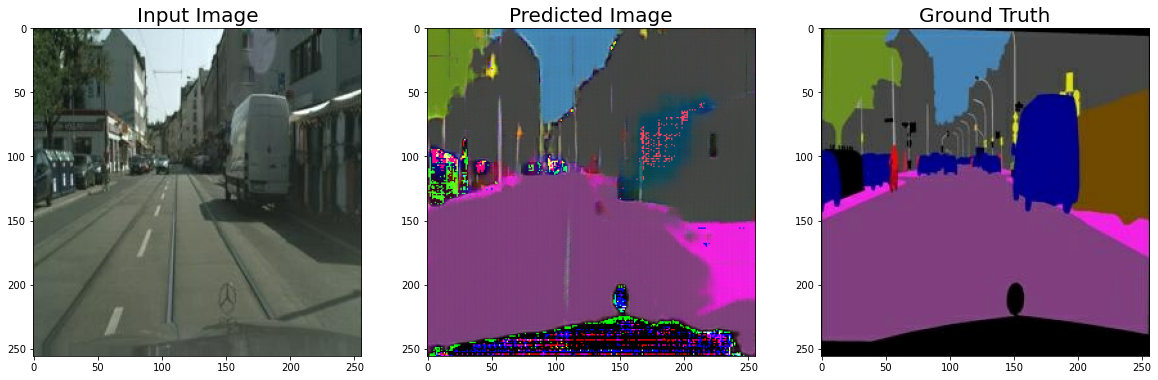

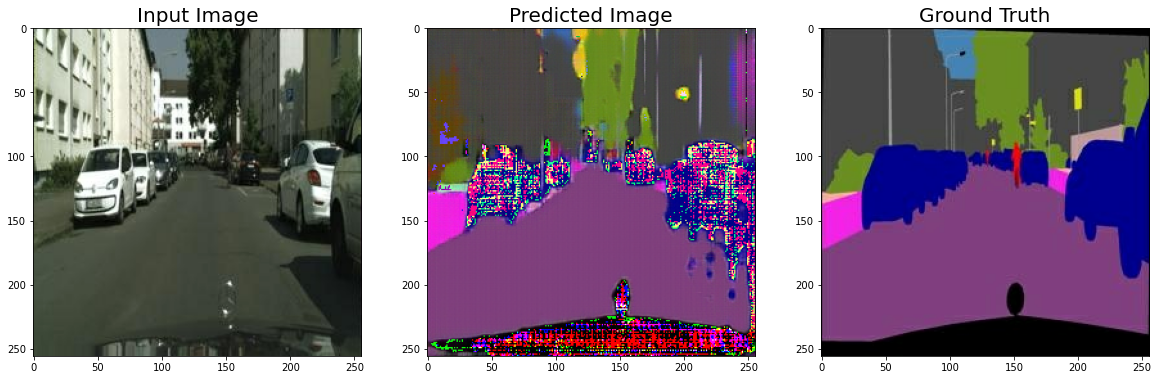

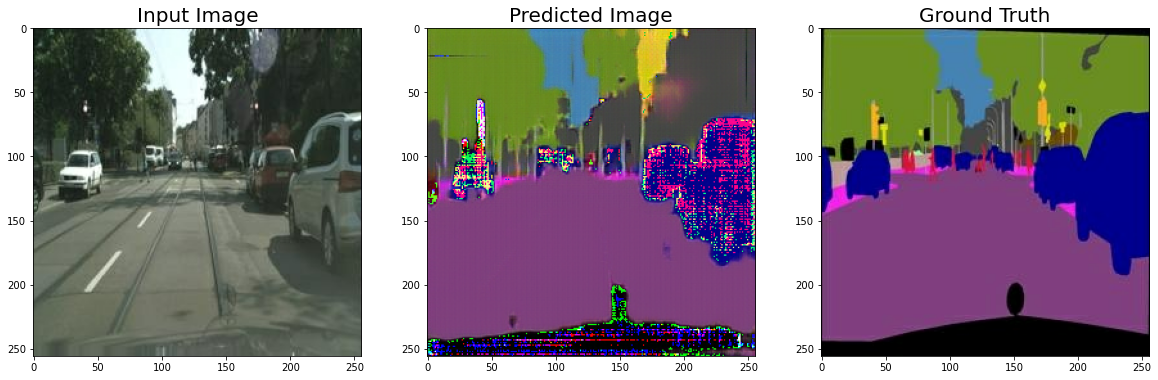

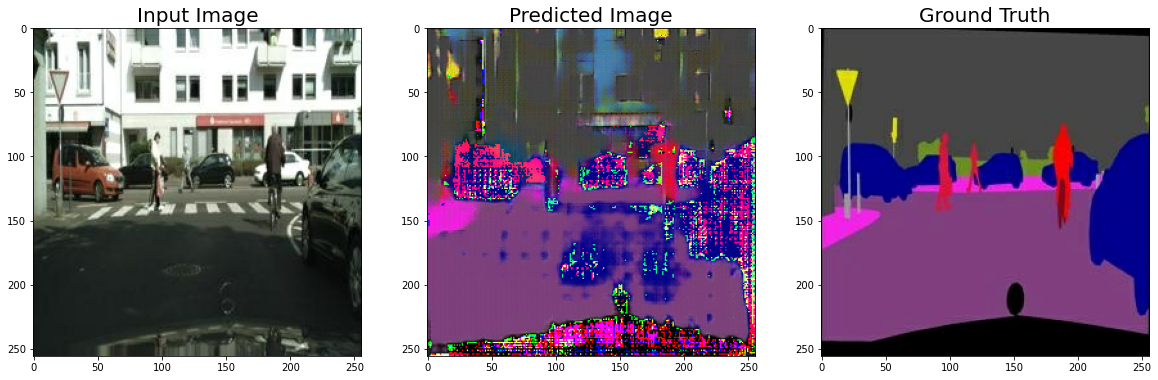

In [22]:
test_path = '/aiffel/aiffel/Exploration/19_conditional_generation/data/cityscapes/val/'

for i in range(5):
    f = test_path + os.listdir(test_path)[i]
    real_img, seg_img = load_img(f)

    pred = generator(tf.expand_dims(seg_img, 0))
    pred = denormalize(pred)

    plt.figure(figsize=(20,10))
    plt.subplot(1,3,1); plt.imshow(denormalize(seg_img)); plt.title('Input Image', fontsize=20)
    plt.subplot(1,3,2); plt.imshow(pred[0]); plt.title('Predicted Image', fontsize=20)
    plt.subplot(1,3,3); plt.imshow(denormalize(real_img)); plt.title('Ground Truth', fontsize=20)

# Ⅳ. 결론

## 1. 결과 분석
- 먼저 200에폭을 돌려 결과를 분석하는 과정에서 20 에폭에 비해 predicted image가 아주 깨끗하지 않지만 상당히
  개선되었음을 확인하였다.
- 그러나 put image와 ground truth가 바뀐 것을 확인하고, sourced의 언팩킹 과정에서 변수의 배치를 변경하고,
  다시 실시하였다.   
- 아쉽게도 125 에폭에서 중단되었고, 마감시간이 임박하여 여기에서 중단함.

## 2. 차후 과제

- 조건을 주어 이미지를 생성할 수 있다는 점에서 많은 가능성이 보인다. 적용할 수 있는 영역을 고민하고 적용해 봐야겠다.